# FAMD

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
# Chargement des données
A = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_AUTOS",index_col=0)
display(A)

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4
Modele,,,,,,,,
GOLF,75,421,149,1217,143,Europe,Diesel,non
CITRONC4,138,426,146,1381,142,France,Diesel,non
P607,204,491,145,1723,223,France,Diesel,non
VELSATIS,150,486,158,1735,188,France,Diesel,non
CITRONC2,61,367,147,932,141,France,Essence,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non
AUDIA3,102,421,143,1205,168,Europe,Essence,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non


In [3]:
B = pd.DataFrame([136,446,168,1520,190,"Autres","Diesel","oui"],index=A.columns,columns=["X-TRAIL"]).T
C  = pd.DataFrame({
    "prix" : [19140,23400,40550,38250,10700,54900,21630,29990,27400,27990],
    "surtaxe" : ["non","non","oui","oui","non","oui","non","oui","oui","oui"]
},index=A.index)
D = pd.concat([pd.concat([A,B],axis=0),C],axis=1)
D

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4,prix,surtaxe
GOLF,75,421,149,1217,143,Europe,Diesel,non,19140.0,non
CITRONC4,138,426,146,1381,142,France,Diesel,non,23400.0,non
P607,204,491,145,1723,223,France,Diesel,non,40550.0,oui
VELSATIS,150,486,158,1735,188,France,Diesel,non,38250.0,oui
CITRONC2,61,367,147,932,141,France,Essence,non,10700.0,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non,54900.0,oui
AUDIA3,102,421,143,1205,168,Europe,Essence,non,21630.0,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui,29990.0,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non,27400.0,oui
SANTA_FE,125,450,173,1757,197,Autres,Diesel,oui,27990.0,oui


In [4]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, GOLF         to X-TRAIL
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   puissance  11 non-null     object 
 1   longueur   11 non-null     object 
 2   hauteur    11 non-null     object 
 3   poids      11 non-null     object 
 4   CO2        11 non-null     object 
 5   origine    11 non-null     object 
 6   carburant  11 non-null     object 
 7   4X4        11 non-null     object 
 8   prix       10 non-null     float64
 9   surtaxe    10 non-null     object 
dtypes: float64(1), object(9)
memory usage: 1.2+ KB


In [5]:
for col in ['puissance','longueur','hauteur','poids',"CO2","prix"]:
    D[col] = D[col].astype("float")

In [6]:
from scientisttools import FAMD
res_afdm = FAMD(ind_sup=10,quanti_sup=8,quali_sup=9,parallelize=False).fit(D)

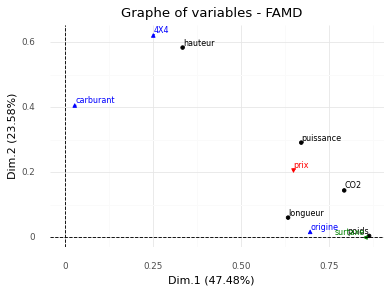

In [7]:
from scientisttools import fviz_famd_var
p = fviz_famd_var(res_afdm,repel=True)
print(p)

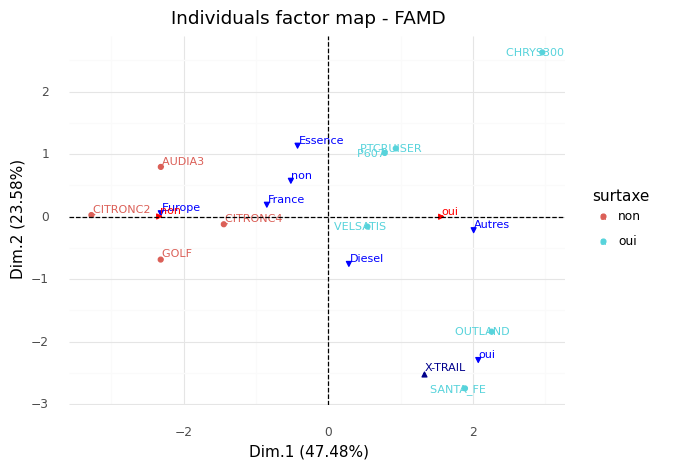

In [8]:
from scientisttools import fviz_famd_ind
p = fviz_famd_ind(res_afdm,color="puissance",habillage="surtaxe",repel=True)
print(p)

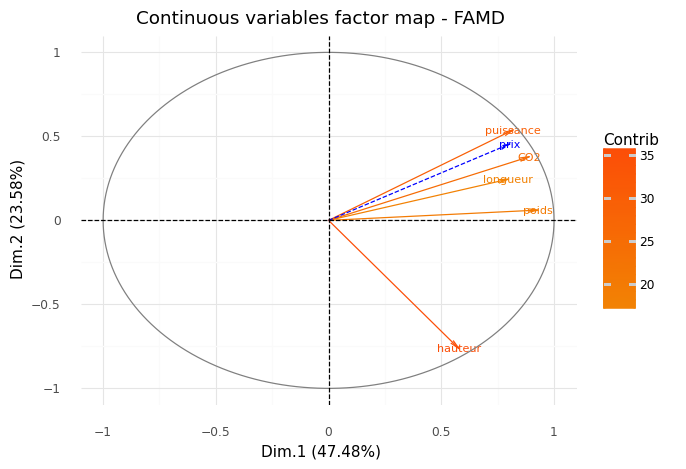

In [9]:
from scientisttools import fviz_famd_col
p = fviz_famd_col(res_afdm,color="contrib")
print(p)

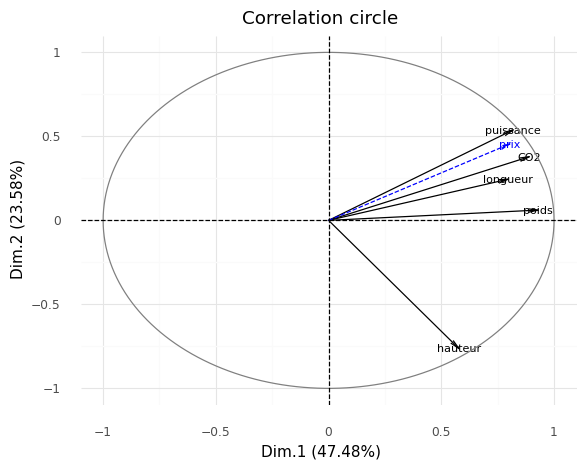

In [10]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_afdm)
print(p)

In [11]:
from scientisttools import summaryFAMD
summaryFAMD(res_afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|
| Variance                |   4.273 |   2.122 |   1.439 |   0.836 |   0.164 |
| Difference              |   2.151 |   0.683 |   0.602 |   0.672 |   0.05  |
| % of var.               |  47.479 |  23.577 |  15.986 |   9.293 |   1.823 |
| Cumulative of % of var. |  47.479 |  71.056 |  87.042 |  96.335 |  98.157 |

Individuals

|           |   Weight |   Sq. Dist. |   Inertia |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:----------|---------:|------------:|----------:|--------:|-------:|-------:|--------:|-------:|-------:|--------:|-------:|-------:|
| GOLF      |      0.1 |       8.932 |     0.893 |  -2.318 | 12.572 |  0.601 |  -0.687 |  2.226 |  0.053 |  -0.078 |  0.043 |  0.001 |
| CIT